## Syntactic Analysis Assignment using Viterbi and Modifications of Viterbi Algorithm

Submitted By:  Anindya Dasgupta

As the execution of models/algorithms were taking considerable amount of time, so I have pickled all the related algorithms/models, just in case required. All the pickle files are attached with this notebook.

Attached pickle files are:-
- Vanilla_Viterbi_tagged_seq.sav
- Viterbi_Mod1_Laplace_Smoothing_tagged_seq.sav
- Viterbi_Mod2_Lexicon_tagged_seq.sav
- Viterbi_Mod2_Rule_based_tagged_seq.sav

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
#downloading universal_tagset dataset
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\af39578\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [4]:
#displaying first five sentences in TreeBank dataset
print(nltk_data[:5])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [5]:
#Splitting dataset into train-test
random.seed(42)
train_set, test_set = train_test_split(nltk_data,test_size=0.05)

print('Length of training dataset=',len(train_set))
print('Length of testing dataset=',len(test_set))

Length of training dataset= 3718
Length of testing dataset= 196


In [6]:
#checking some training data
print(train_set[:10])

[[('A', 'DET'), ('full', 'ADJ'), (',', '.'), ('four-color', 'ADJ'), ('page', 'NOUN'), ('in', 'ADP'), ('Newsweek', 'NOUN'), ('will', 'VERB'), ('cost', 'VERB'), ('$', '.'), ('100,980', 'NUM'), ('*U*', 'X'), ('.', '.')], [('In', 'ADP'), ('Arizona', 'NOUN'), (',', '.'), ('California', 'NOUN'), (',', '.'), ('Florida', 'NOUN'), (',', '.'), ('Louisiana', 'NOUN'), (',', '.'), ('Maryland', 'NOUN'), (',', '.'), ('New', 'NOUN'), ('Jersey', 'NOUN'), (',', '.'), ('South', 'NOUN'), ('Carolina', 'NOUN'), ('and', 'CONJ'), ('Texas', 'NOUN'), (',', '.'), ('educators', 'NOUN'), ('say', 'VERB'), ('0', 'X'), ('they', 'PRON'), ('are', 'VERB'), ('common', 'ADJ'), ('classroom', 'NOUN'), ('tools', 'NOUN'), ('.', '.')], [('The', 'DET'), ('Treasury', 'NOUN'), ('plans', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('sell', 'VERB'), ('$', '.'), ('30', 'NUM'), ('billion', 'NUM'), ('*U*', 'X'), ('in', 'ADP'), ('notes', 'NOUN'), ('and', 'CONJ'), ('bonds', 'NOUN'), ('next', 'ADP'), ('week', 'NOUN'), ('but', 'CONJ'), ('will',

In [7]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
print('Length of train POS tagged words=',len(train_tagged_words))

Length of train POS tagged words= 95674


In [8]:
#checking out some training words with POS tagged
train_tagged_words[:10]

[('A', 'DET'),
 ('full', 'ADJ'),
 (',', '.'),
 ('four-color', 'ADJ'),
 ('page', 'NOUN'),
 ('in', 'ADP'),
 ('Newsweek', 'NOUN'),
 ('will', 'VERB'),
 ('cost', 'VERB'),
 ('$', '.')]

#### Creating Vocabulary Set

In [9]:
# Extracting tokens (or words) from the train_tagged_words list
tokens = [pair[0] for pair in train_tagged_words]
print('Total number of words prsent in the vocabulary=',len(tokens))
print('_'*50)
print('Displaying top ten tokens\n')
tokens[:10]

Total number of words prsent in the vocabulary= 95674
__________________________________________________
Displaying top ten tokens



['A', 'full', ',', 'four-color', 'page', 'in', 'Newsweek', 'will', 'cost', '$']

In [10]:
# creating vocabulary set
vocab_set = set(tokens)
vocab_set_len = len(vocab_set)
print("Count of unique words in the vocabulary =",vocab_set_len)

Count of unique words in the vocabulary = 12071


#### Creating Tag Set

In [11]:
# Extracting tags from the train_tagged_words list
tags = [pair[1] for pair in train_tagged_words]
print('Total number of tags prsent in the dataset=',len(tags))
print('_'*50)
print('Displaying top ten tags\n')
tags[:10]

Total number of tags prsent in the dataset= 95674
__________________________________________________
Displaying top ten tags



['DET', 'ADJ', '.', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'VERB', 'VERB', '.']

In [12]:
# creating tag set
tag_set = set(tags)
tag_set_len = len(tag_set)
print("Count of unique tags in the vocabulary =",tag_set_len)
print("\nDisctinct tags are: ",tag_set)

Count of unique tags in the vocabulary = 12

Disctinct tags are:  {'PRON', 'NUM', 'VERB', 'CONJ', 'DET', 'ADP', '.', 'X', 'PRT', 'ADJ', 'NOUN', 'ADV'}


### Emisssion Probability

Emission prbability of a word 'W' for a tag 't' is given by:-

**P(W|t) = *Number of times W has been tagged t / Number of times t appears***

In [13]:
# computing P(w/t) and storing in T x V matrix
w_given_t = np.zeros((tag_set_len, vocab_set_len))

In [14]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [15]:
# Some examples of word_given_tag
print("\nWord ->", "He")
print(word_given_tag('He', 'PRON'))
print(word_given_tag('He', 'NOUN'))

print("\nWrord ->", "large")
print(word_given_tag('large', 'ADJ'))
print(word_given_tag('large', 'NOUN'))


Word -> He
(70, 2614)
(0, 27448)

Wrord -> large
(29, 6080)
(0, 27448)


### Transition Probability

Transition probability of a tag t1 followed by tag t2 is given by:

**P(t2|t1) = *Number of times t1 is followed by t2 / Number of times t1 appears***

In [16]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [17]:
# Some examples of common POS tags followed by another POS tag
print(t2_given_t1(t2='NOUN', t1='DET'))
print(t2_given_t1('NOUN', 'ADJ'))

(5286, 8282)
(4244, 6080)


In [18]:
# Creating transition matrix of tag_Set_len x tag_set len
# row corresponds to t1, column corresponds to t2 and the cell represents P(tj|ti)

transition_proba_matrix = np.zeros((tag_set_len, tag_set_len), dtype='float32')
for i, t1 in enumerate(list(tag_set)):
    for j, t2 in enumerate(list(tag_set)): 
        transition_proba_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [19]:
transition_proba_matrix

array([[8.03366490e-03, 7.26855407e-03, 4.89288449e-01, 4.97322110e-03,
        9.56388656e-03, 2.29533277e-02, 4.16985452e-02, 9.02830884e-02,
        1.30068855e-02, 7.23029822e-02, 2.07345068e-01, 3.32823247e-02],
       [1.48721004e-03, 1.85603812e-01, 1.66567527e-02, 1.36823319e-02,
        3.27186193e-03, 3.48007120e-02, 1.16002381e-01, 2.11481258e-01,
        2.76621059e-02, 3.36109474e-02, 3.52766216e-01, 2.97442009e-03],
       [3.60660814e-02, 2.28030719e-02, 1.69161558e-01, 5.27417986e-03,
        1.33638412e-01, 9.18327793e-02, 3.45148519e-02, 2.18568221e-01,
        3.18777636e-02, 6.56945631e-02, 1.09439231e-01, 8.11292976e-02],
       [5.76112419e-02, 3.93442623e-02, 1.55971900e-01, 4.68384067e-04,
        1.18032783e-01, 5.57377040e-02, 3.41920368e-02, 8.43091309e-03,
        4.68384055e-03, 1.18969552e-01, 3.50819677e-01, 5.57377040e-02],
       [3.62231350e-03, 2.22168565e-02, 3.93624716e-02, 4.82975127e-04,
        5.31272637e-03, 9.41801537e-03, 1.79908238e-02, 4.56

In [20]:
# Creating a datframe using the above transition_proba_matrix
# row = t1, column = t2

tags_df = pd.DataFrame(transition_proba_matrix, columns = list(tag_set), index=list(tag_set))
tags_df

,PRON,NUM,VERB,CONJ,DET,ADP,.,X,PRT,ADJ,NOUN,ADV
PRON,0.008034,0.007269,0.489288,0.004973,0.009564,0.022953,0.041699,0.090283,0.013007,0.072303,0.207345,0.033282
NUM,0.001487,0.185604,0.016657,0.013682,0.003272,0.034801,0.116002,0.211481,0.027662,0.033611,0.352766,0.002974
VERB,0.036066,0.022803,0.169162,0.005274,0.133638,0.091833,0.034515,0.218568,0.031878,0.065695,0.109439,0.081129
CONJ,0.057611,0.039344,0.155972,0.000468,0.118033,0.055738,0.034192,0.008431,0.004684,0.118970,0.350820,0.055738
DET,0.003622,0.022217,0.039362,0.000483,0.005313,0.009418,0.017991,0.045641,0.000241,0.204540,0.638252,0.012920
ADP,0.068620,0.062973,0.008737,0.000852,0.322856,0.016622,0.039957,0.034204,0.001492,0.106660,0.323388,0.013639
.,0.066619,0.080804,0.088705,0.058000,0.173909,0.090860,0.092566,0.027474,0.002245,0.043904,0.222392,0.052433
X,0.056574,0.002869,0.204303,0.010199,0.054343,0.145498,0.163665,0.073944,0.184064,0.016733,0.062470,0.025339
PRT,0.017898,0.056948,0.397982,0.001952,0.102831,0.020176,0.043606,0.012040,0.001627,0.085259,0.249919,0.009762
ADJ,0.000658,0.019901,0.012007,0.017105,0.005099,0.079605,0.065461,0.021217,0.011020,0.065132,0.698026,0.004770


#### EDA

(12.0, 0.0)

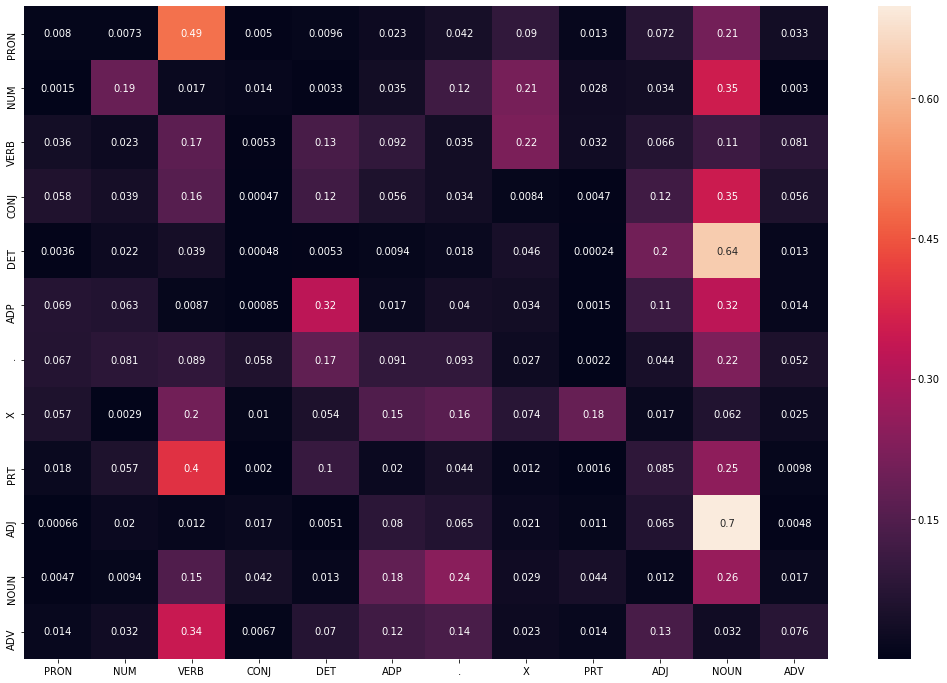

In [21]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)

plt.figure(figsize=(18, 12))
ax = sns.heatmap(tags_df,annot=True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

(12.0, 0.0)

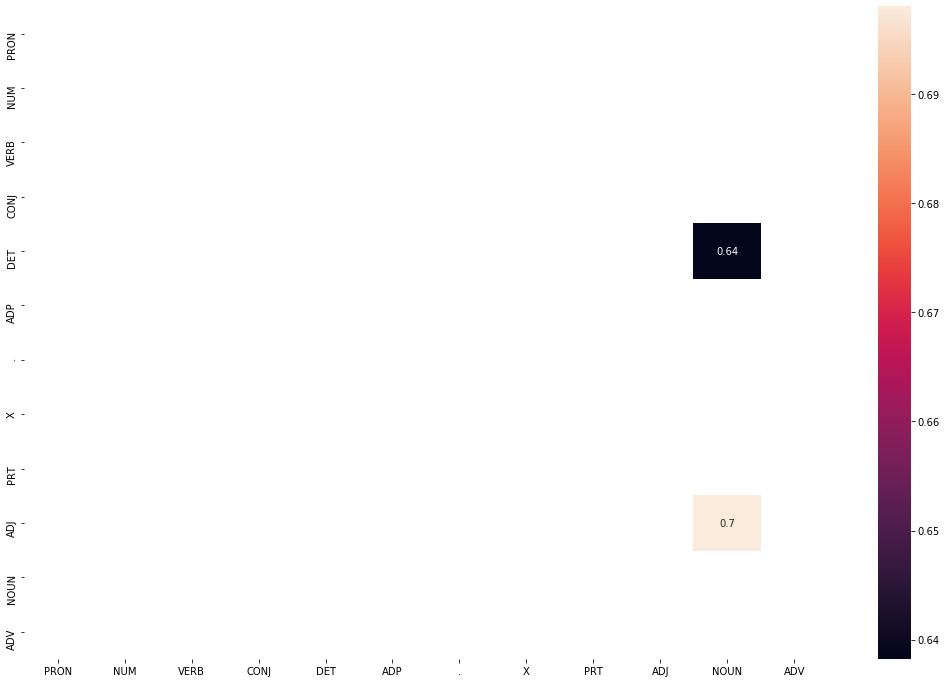

In [22]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
ax = sns.heatmap(tags_frequent, annot=True)
ax.set_ylim(top+0.5, bottom-0.5)

*DET followed by NOUN and ADJ followed by NOUN has the highest transition probabilities and are most frequent*

### Build the vanilla Viterbi based POS tagger

Function: Vanilla_Viterbi

In [23]:
# Viterbi Heuristic
def Vanilla_Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating on Validation Set

In [24]:
# list of tagged words

random.seed(42)
test_set_tag_words_pair = [tup for sent in test_set for tup in sent]

# list of untagged words
test_set_words = [tup[0] for sent in test_set for tup in sent]

In [25]:
test_set_tag_words_pair[:10]

[('OSHA', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('there', 'DET'),
 ('have', 'VERB'),
 ('been', 'VERB'),
 ('three', 'NUM'),
 ('worker', 'NOUN'),
 ('fatalities', 'NOUN'),
 ('at', 'ADP')]

In [26]:
test_set_words[:10]

['OSHA',
 'said',
 '0',
 'there',
 'have',
 'been',
 'three',
 'worker',
 'fatalities',
 'at']

In [27]:
# tagging the test sentences

start = time.time()
#commenting tagged_seq as we'll pcikle this object
#Vanilla_Viterbi_tagged_seq = Vanilla_Viterbi(test_set_words)
end = time.time()
difference = end-start

print('Time taken for Vanilla Viterbi Heuristic', difference)

Time taken for Vanilla Viterbi Heuristic 714.050226688385


In [28]:
#Saving Vanilla Viterbi tagged seq in local
import joblib
filename_Vanilla_viterbi = 'Vanilla_Viterbi_tagged_seq.sav'
joblib.dump(Vanilla_Viterbi_tagged_seq, filename_Vanilla_viterbi)

['Vanilla_Viterbi_tagged_seq.sav']

In [29]:
#load back tagged_seq
Vanilla_Viterbi_tagged_seq = joblib.load(filename_Vanilla_viterbi)

In [30]:
Vanilla_Viterbi_tagged_seq[:10]

[('OSHA', 'NOUN'),
 ('said', 'VERB'),
 ('0', 'X'),
 ('there', 'DET'),
 ('have', 'VERB'),
 ('been', 'VERB'),
 ('three', 'NUM'),
 ('worker', 'NOUN'),
 ('fatalities', 'NOUN'),
 ('at', 'ADP')]

In [31]:
# accuracy
check = [i for i, j in zip(Vanilla_Viterbi_tagged_seq, test_set_tag_words_pair) if i == j]

In [32]:
vanilla_viterbi_accuracy = len(check)/len(Vanilla_Viterbi_tagged_seq)
print('Accuracy of Vanilla Viterbi Technique is = ',vanilla_viterbi_accuracy)

Accuracy of Vanilla Viterbi Technique is =  0.9070371851259497


In [33]:
#incorrect tag sequences
incorrect_tagged_cases = [[test_set_tag_words_pair[i-1],j] for i, j in enumerate(zip(Vanilla_Viterbi_tagged_seq, test_set_tag_words_pair)) if j[0]!=j[1]]

In [34]:
print('Count of incorrectly tagged words are=',(len(incorrect_tagged_cases)))

Count of incorrectly tagged words are= 465


In [35]:
incorrect_tagged_cases

[[('In', 'ADP'), (('lieu', 'PRON'), ('lieu', 'NOUN'))],
 [('grandfather', 'NOUN'), (('clock', 'PRON'), ('clock', 'NOUN'))],
 [('a', 'DET'), (('stereo', 'PRON'), ('stereo', 'NOUN'))],
 [('videocassette', 'NOUN'), (('recorder', 'PRON'), ('recorder', 'NOUN'))],
 [('print', 'VERB'), (('hither', 'PRON'), ('hither', 'ADV'))],
 [('to', 'PRT'), (('yon', 'PRON'), ('yon', 'ADV'))],
 [('almost', 'ADV'), (('single-handed', 'PRON'), ('single-handed', 'ADJ'))],
 [('way', 'NOUN'), (('sanctions', 'NOUN'), ('sanctions', 'VERB'))],
 [('the', 'DET'), (('dismal', 'PRON'), ('dismal', 'ADJ'))],
 [('*-1', 'X'), (('unwilling', 'PRON'), ('unwilling', 'ADJ'))],
 [('and', 'CONJ'), (('manpower', 'PRON'), ('manpower', 'NOUN'))],
 [('*', 'X'), (('removing', 'PRON'), ('removing', 'VERB'))],
 [('*', 'X'), (('safeguarding', 'PRON'), ('safeguarding', 'VERB'))],
 [('Linda', 'NOUN'), (('Anku', 'PRON'), ('Anku', 'NOUN'))],
 [('*T*-1', 'X'), (('co-founded', 'PRON'), ('co-founded', 'VERB'))],
 [(',', '.'), (('Mo.-based', 'P

In [36]:
# Unknown words 

train_vocab_set = vocab_set
test_vocab_set = set([t for t in test_set_words])

unknown_words_list = list(test_vocab_set - train_vocab_set)
print("Count of Unknown words in test set :", len(unknown_words_list))
print("\nUnknown words in test data are listed below :")
print("*"*50)
print(unknown_words_list)

Count of Unknown words in test set : 337

Unknown words in test data are listed below :
**************************************************
['knell', 'benchmarks', 'computer-system-design', 'Takes', '*-164', 'lender', 'item', 'Virginians', 'Anti-Deficiency', 'phony', 'near-limit', 'please', '1933', 'old-style', 'lend-lease', '38.375', 'accurately', 'delayed', 'botched', 'near-record', 'drift', 'kindness', 'co-founded', 'fielded', 'felonies', 'motor-home', 'Truck', '*T*-154', 'administrators', 'protected', 'hailing', 'log', 'evolve', 'Wilson', 'stereotyped', 'Johnson-era', 'TRANSPLANT', 'pollution', 'Purina', 'Woodrow', 'stereo', 'Calder', 'Junk', 'recorder', 'Tray', 'Henderson', 'bargains', 'exuded', 'Backseat', 'agriculture', '235', 'akin', 'Roman', 'tricky', 'full-year', 'titans', 'Mo.-based', 'W.N.', 'receipt', 'hither', 'abounding', 'pre-1933', 'quantitive', 'Goodman', 'blood-cell', 'evolved', '241', 'kidnapper', 'uttering', 'justified', 'Anku', 'Lowe', 'IX', '*T*-77', 'manpower', '

We have achieved an accuracy of ~90% on test data using Vanilla Viterbi.
We are looosing out on 10% as because of the unknown words in the test data which are getting incorrectly tagged using Vanilla Viterbi.

Let's now explore how to modify the Vanilla Viterbi Algorithm such that the unknown words are also handled

## Solve the problem of unknown words

# Modification #1: Modifying Viterbi Algorithm to handle Unknown Words by modifying state_probability expression

As we have seen there are around 320 unknown words in the test set, which are unhandled by the Vanilla Viterbi.
For example, *'earning', 'Mindy', 'heavy-duty', 'diplomatic', 'ordeal', '49.9', 'Being', 'traveled'* etc.

*The state_probablities of these unknown words is calculated to be transition_p * emission_p, since emission_p is equal to 0 as the word itself is not present in the vocabulary resultant state_probabiility results in 0.*

So in order handle this we will tweak the Vanilla Viterbi Algorithm -

*We will consider the state_probability of unknown words to be-*

**state_probability = transition_probability * 0.001** *(Laplace Smoothing factor)*

Function: Viterbi_to_handle_Unknown_Words()

In [37]:
# Viterbi Heuristic
def Viterbi_to_handle_Unknown_Words(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            
            # Modification 1: modifying state_probability to handle unknown words
            if word not in train_vocab_set:
                state_probability = transition_p * 0.001 #laplace smoothing factor  
            else:
                state_probability = emission_p * transition_p
            
            p.append(state_probability)
            
        pmax = max(p)
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

### Evaluating Viterbi Modification #1 on validation set

In [38]:
# tagging the test sentences

start = time.time()
#Commenting Viterbi_Mod1_tagged_seq as we'll pickle this object
#Viterbi_Mod1_Laplace_Smoothing_tagged_seq = Viterbi_to_handle_Unknown_Words(test_set_words)
end = time.time()
difference = end-start

print('Time taken for Viterbi_to_handle_Unknown_Words', difference)

Time taken for Viterbi_to_handle_Unknown_Words 708.6133785247803


In [39]:
#Saving Viterbi Mod 1 tagged seq in local
import pickle
filename_Viterbi_Mod1 = 'Viterbi_Mod1_Laplace_Smoothing_tagged_seq.sav'
joblib.dump(Viterbi_Mod1_Laplace_Smoothing_tagged_seq, filename_Viterbi_Mod1)

['Viterbi_Mod1_Laplace_Smoothing_tagged_seq.sav']

In [40]:
#load back Viterbi Mod 1
Viterbi_Mod1_Laplace_Smoothing_tagged_seq = joblib.load(filename_Viterbi_Mod1)

In [41]:
# accuracy
check = [i for i, j in zip(Viterbi_Mod1_Laplace_Smoothing_tagged_seq, test_set_tag_words_pair) if i == j]

In [42]:
laplace_smoothing_accuracy = len(check)/len(Viterbi_Mod1_Laplace_Smoothing_tagged_seq)
print('Accuracy of 1st Modified Viterbi Technique = ',laplace_smoothing_accuracy)

Accuracy of 1st Modified Viterbi Technique =  0.9440223910435825


In [43]:
#incorrect tag sequences in 1st Modified Viterbi Algorithm

incorrect_tagged_cases_Viterbi_Mod1 = [[test_set_tag_words_pair[i-1],j] for i, j in enumerate(zip(Viterbi_Mod1_Laplace_Smoothing_tagged_seq, test_set_tag_words_pair)) if j[0]!=j[1]]

In [44]:
print('Count of incorrectly tagged words are=',(len(incorrect_tagged_cases_Viterbi_Mod1)))

Count of incorrectly tagged words are= 280


In [45]:
incorrect_tagged_cases_Viterbi_Mod1

[[('print', 'VERB'), (('hither', 'X'), ('hither', 'ADV'))],
 [('to', 'PRT'), (('yon', 'VERB'), ('yon', 'ADV'))],
 [('almost', 'ADV'), (('single-handed', 'VERB'), ('single-handed', 'ADJ'))],
 [('way', 'NOUN'), (('sanctions', 'NOUN'), ('sanctions', 'VERB'))],
 [('the', 'DET'), (('dismal', 'NOUN'), ('dismal', 'ADJ'))],
 [('*-1', 'X'), (('unwilling', 'VERB'), ('unwilling', 'ADJ'))],
 [(',', '.'), (('Mo.-based', 'NOUN'), ('Mo.-based', 'ADJ'))],
 [('a', 'DET'), (('five-year', 'NOUN'), ('five-year', 'ADJ'))],
 [('backers', 'NOUN'), (('fielded', 'NOUN'), ('fielded', 'VERB'))],
 [('The', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('each', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('could', 'VERB'), (('intimidate', 'X'), ('intimidate', 'VERB'))],
 [('``', '.'), (('Provided', 'NOUN'), ('Provided', 'VERB'))],
 [(',', '.'), (('that', 'DET'), ('that', 'ADP'))],
 [('that', 'ADP'), (('no', 'ADV'), ('no', 'DET'))],
 [('``', '.'), (('evolved', 'NOUN'), ('evolved', 'VERB'))

Accuracy is improved a bit after modification 1 : ~94%

Let's explore more for some other modifications using Lexicon and Rule Based tagging techniques

# Modification #2: Modifying Viterbi Algorithm to handle Unknown Words coupled with Rule-based and Lexicon Taggers

In [46]:
patterns = [
    #Numbers to be tagged as NUM
    (r'^-?[0-9]+(.[0-9]+)?$','NUM'),
    #Alpha Numeric to be tagged as NOUN
    (r'^[aA-zZ].*[0-9]+','NOUN'), 
    #(r'.*ness$', 'NOUN'),
    #Possesive nouns to be tagged as NOUN
    (r'.*\'s$', 'NOUN'),
    #Plural nouns to be tagged as NOUN
    (r'.*s$', 'NOUN'), 
    #Regular nouns to be tagged as NOUN
    (r'.*', 'NOUN'),
    #Special characters to be tagged as X
    (r'^(0|([*|-|$].*))','X'),
    #for values like *T*-237 to be tagged to X
    (r'\*T?\*?-[0-9]*$', 'X'),
    #Adverbs to be tagged as ADV
    (r'.*ly$', 'ADV'),
    #Modal Verbs to be tagged as X
    (r'.*ould$', 'X'),
    #Articles to be tagged as DET
    (r'(The|the|A|a|An|an)$', 'DET'),
    #Word ending with 'like', 'ful', 'able', 'ical','less', 'ous' to be tagged as ADJ
    (r'.*(like|ful|able|ical|less|ous)$', 'ADJ'),
    #Words ending with es, ing, ed are to be tagged as VERB 
    (r'.*(es|ing|ed|)$', 'VERB')
    ]

#### Rule-based tagger

In [47]:
#rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)
rule_based_accuracy = rule_based_tagger.evaluate(test_set)
print("Rule based tagger accuracy = ",rule_based_accuracy)

Rule based tagger accuracy =  0.3090763694522191


Rule based alone has very poor accuracy, let's now couple it with it lexicon tagger and use rule based as backoff

#### Lexicon-based Tagger - Unigram Tagger

In [48]:
#lexicon based - Unigram Tagger with rule-based as backoff
lexicon_unigram_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_tagger)
lexicon_unigram_accuracy = lexicon_unigram_tagger.evaluate(test_set)
print("Accuracy of Unigram Tagger backed by Rule-based tagger =",lexicon_unigram_accuracy)

Accuracy of Unigram Tagger backed by Rule-based tagger = 0.9418232706917233


**NLTK Unigram tagger is able to produce accuracy of *94.2%* with rule based tagger as backoff.**

Let's see how bigram lexicon tagger performs with backoff set to Unigram

#### Lexicon-based Tagger -  Bigram Tagger

In [49]:
#Bigram tagger with unigram as backoff
lexicon_bigram_tagger = nltk.BigramTagger(train_set, backoff=rule_based_tagger)
lexicon_bigram_acuuracy = lexicon_bigram_tagger.evaluate(test_set)
print("Accuracy of Bigram Tagger backed by rule-based tagger =",lexicon_bigram_acuuracy)

Accuracy of Bigram Tagger backed by rule-based tagger = 0.9094362255097961


Accuracy degrades after using Bigram Tagger instead of Unigram tagger. As Bigram tagger is focussed on pair of words, while Unigram is focussed on a single word. In our case, we need to deal with single words to identify their tags

**NLTK Bigram tagger is able to produce accuracy of *90.5%* with rule-based as backoff.**

So going forward, we will use Unigram tagger coupled with Rule based tagger. As we are dealing with single word Unigram tagger would be helful here

But let's check for a sample word before proceeding with Unigram Tagger

In [50]:
#Sample check
unknown_word = [tup[0] for sent in lexicon_unigram_tagger.tag_sents([[('ambiguity')]]) for tup in sent]
unknown_tag = [tup[1] for sent in lexicon_unigram_tagger.tag_sents([[('ambiguity')]]) for tup in sent]
print("Sample unknown word is: ",unknown_word)
print("Sample unknown tag is: ",unknown_tag)

Sample unknown word is:  ['ambiguity']
Sample unknown tag is:  ['NOUN']


In [51]:
lexicon_unigram_tagger.tag(['ambiguity'])

[('ambiguity', 'NOUN')]

Works fine!

#### Let's now couple rule-based and lexicon based tagger with modified Viterbi and see which gives better accuracies

Functions-
- Viterbi_coupled_with_lexicon_taggers()
- Viterbi_coupled_with_rule_based_taggers()

In [52]:
#Viterbi + Lexicon
def Viterbi_coupled_with_lexicon_taggers(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        #assigning POS tags as rule based one
        state_max = lexicon_unigram_tagger.tag([word])[0][1]       
       
        #for Other/Foreign words and words with state_proba= 0 assigning rule based tag
        if((pmax==0) or (state_max=='X')):
            state_max = lexicon_unigram_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

### Evaluating Modified Viterbi + Lexicon based tagger on validation set

In [53]:
# tagging the test sentences

start = time.time()
#Commenting Viterbi_Mod2_tagged_seq as we'll pickle this object
#Viterbi_Mod2_Lexicon_tagged_seq = Viterbi_coupled_with_lexicon_taggers(test_set_words)
end = time.time()
difference = end-start

print('Time taken for Viterbi_coupled_with_lexicon_taggers', difference)

Time taken for Viterbi_coupled_with_lexicon_taggers 659.4022822380066


In [54]:
#Saving Viterbi Mod 2 tagged seq in local
import pickle
filename_Viterbi_Lexicon = 'Viterbi_Mod2_Lexicon_tagged_seq.sav'
joblib.dump(Viterbi_Mod2_Lexicon_tagged_seq, filename_Viterbi_Lexicon)

['Viterbi_Mod2_Lexicon_tagged_seq.sav']

In [55]:
#load back Viterbi Mod 1
Viterbi_Mod2_Lexicon_tagged_seq = joblib.load(filename_Viterbi_Lexicon)

In [56]:
# accuracy
check = [i for i, j in zip(Viterbi_Mod2_Lexicon_tagged_seq, test_set_tag_words_pair) if i == j]

In [57]:
viterbi_lexicon_accuracy = len(check)/len(Viterbi_Mod2_Lexicon_tagged_seq)
print('Accuracy of 2nd Modified Viterbi Technique = ',viterbi_lexicon_accuracy)

Accuracy of 2nd Modified Viterbi Technique =  0.9468212714914035


In [58]:
#incorrect tag sequences in 1st Modified Viterbi Algorithm

incorrect_tagged_cases_Viterbi_Mod2 = [[test_set_tag_words_pair[i-1],j] for i, j in enumerate(zip(Viterbi_Mod2_Lexicon_tagged_seq, test_set_tag_words_pair)) if j[0]!=j[1]]

In [59]:
print('Count of incorrectly tagged words are=',(len(incorrect_tagged_cases_Viterbi_Mod2)))

Count of incorrectly tagged words are= 266


In [60]:
incorrect_tagged_cases_Viterbi_Mod2

[[('print', 'VERB'), (('hither', 'NOUN'), ('hither', 'ADV'))],
 [('to', 'PRT'), (('yon', 'NOUN'), ('yon', 'ADV'))],
 [('almost', 'ADV'), (('single-handed', 'NOUN'), ('single-handed', 'ADJ'))],
 [('way', 'NOUN'), (('sanctions', 'NOUN'), ('sanctions', 'VERB'))],
 [('the', 'DET'), (('dismal', 'NOUN'), ('dismal', 'ADJ'))],
 [('*-1', 'X'), (('unwilling', 'NOUN'), ('unwilling', 'ADJ'))],
 [('*', 'X'), (('removing', 'NOUN'), ('removing', 'VERB'))],
 [('*', 'X'), (('safeguarding', 'NOUN'), ('safeguarding', 'VERB'))],
 [('*T*-1', 'X'), (('co-founded', 'NOUN'), ('co-founded', 'VERB'))],
 [(',', '.'), (('Mo.-based', 'NOUN'), ('Mo.-based', 'ADJ'))],
 [('a', 'DET'), (('five-year', 'NOUN'), ('five-year', 'ADJ'))],
 [('backers', 'NOUN'), (('fielded', 'NOUN'), ('fielded', 'VERB'))],
 [('The', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('each', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('could', 'VERB'), (('intimidate', 'NOUN'), ('intimidate', 'VERB'))],
 [('*-1', 'X'), (

In [61]:
#Viterbi + Rule_based
def Viterbi_coupled_with_rule_based_taggers(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        #assigning POS tags as rule based one
        state_max = rule_based_tagger.tag([word])[0][1]       
       
        #for Other/Foreign words and words with state_proba= 0 assigning rule based tag
        if((pmax==0) or (state_max=='X')):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

### Evaluating Modified Viterbi + Rule based tagger on validation set

In [62]:
# tagging the test sentences

start = time.time()
#Commenting Viterbi_Mod2_tagged_seq as we'll pickle this object
#Viterbi_Mod2_Rule_based_tagged_seq = Viterbi_coupled_with_rule_based_taggers(test_set_words)
end = time.time()
difference = end-start

print('Time taken for Viterbi_coupled_with_rule_based_taggers', difference)

Time taken for Viterbi_coupled_with_rule_based_taggers 655.5344219207764


In [63]:
#Saving Viterbi Mod 2 tagged seq in local
import pickle
filename_Viterbi_rule_based = 'Viterbi_Mod2_Rule_based_tagged_seq.sav'
joblib.dump(Viterbi_Mod2_Rule_based_tagged_seq, filename_Viterbi_rule_based)

['Viterbi_Mod2_Rule_based_tagged_seq.sav']

In [64]:
#load back Viterbi Mod 1
Viterbi_Mod2_Rule_based_tagged_seq = joblib.load(filename_Viterbi_rule_based)

In [65]:
# accuracy
check = [i for i, j in zip(Viterbi_Mod2_Rule_based_tagged_seq, test_set_tag_words_pair) if i == j]

In [66]:
viterbi_rule_based_accuracy = len(check)/len(Viterbi_Mod2_Rule_based_tagged_seq)
print('Accuracy of 2nd Modified Viterbi Technique = ',viterbi_rule_based_accuracy)

Accuracy of 2nd Modified Viterbi Technique =  0.9468212714914035


In [67]:
#incorrect tag sequences in 1st Modified Viterbi Algorithm

incorrect_tagged_cases_Viterbi_Mod2_rule = [[test_set_tag_words_pair[i-1],j] for i, j in enumerate(zip(Viterbi_Mod2_Rule_based_tagged_seq, test_set_tag_words_pair)) if j[0]!=j[1]]

In [68]:
print('Count of incorrectly tagged words are=',(len(incorrect_tagged_cases_Viterbi_Mod2_rule)))

Count of incorrectly tagged words are= 266


In [69]:
incorrect_tagged_cases_Viterbi_Mod2_rule

[[('print', 'VERB'), (('hither', 'NOUN'), ('hither', 'ADV'))],
 [('to', 'PRT'), (('yon', 'NOUN'), ('yon', 'ADV'))],
 [('almost', 'ADV'), (('single-handed', 'NOUN'), ('single-handed', 'ADJ'))],
 [('way', 'NOUN'), (('sanctions', 'NOUN'), ('sanctions', 'VERB'))],
 [('the', 'DET'), (('dismal', 'NOUN'), ('dismal', 'ADJ'))],
 [('*-1', 'X'), (('unwilling', 'NOUN'), ('unwilling', 'ADJ'))],
 [('*', 'X'), (('removing', 'NOUN'), ('removing', 'VERB'))],
 [('*', 'X'), (('safeguarding', 'NOUN'), ('safeguarding', 'VERB'))],
 [('*T*-1', 'X'), (('co-founded', 'NOUN'), ('co-founded', 'VERB'))],
 [(',', '.'), (('Mo.-based', 'NOUN'), ('Mo.-based', 'ADJ'))],
 [('a', 'DET'), (('five-year', 'NOUN'), ('five-year', 'ADJ'))],
 [('backers', 'NOUN'), (('fielded', 'NOUN'), ('fielded', 'VERB'))],
 [('The', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('each', 'DET'), (('preferred', 'ADJ'), ('preferred', 'VERB'))],
 [('could', 'VERB'), (('intimidate', 'NOUN'), ('intimidate', 'VERB'))],
 [('*-1', 'X'), (

#### Comparision of overall tagging accuracies on validation data (test_set after splitting the dataset) for all models

In [70]:
training_tagging_accuracy = pd.DataFrame({'Models':['Vanilla viterbi',
                                                   'Viterbi_to_handle_Unknown_Words',
                                                   'Rule-based taggers',
                                                   'Unigram coupled with Rule-based',
                                                   'Bigram coupled with Rule-based',
                                                   'Viterbi_coupled_with_lexicon_taggers',
                                                   'Viterbi_coupled_with_rule_based_taggers'],
                                        'Accuracy':[vanilla_viterbi_accuracy,
                                                    laplace_smoothing_accuracy,
                                                    rule_based_accuracy,
                                                    lexicon_unigram_accuracy,
                                                    lexicon_bigram_acuuracy,
                                                    viterbi_lexicon_accuracy,
                                                    viterbi_rule_based_accuracy]})

training_tagging_accuracy

,Models,Accuracy
0,Vanilla viterbi,0.907037
1,Viterbi_to_handle_Unknown_Words,0.944022
2,Rule-based taggers,0.309076
3,Unigram coupled with Rule-based,0.941823
4,Bigram coupled with Rule-based,0.909436
5,Viterbi_coupled_with_lexicon_taggers,0.946821
6,Viterbi_coupled_with_rule_based_taggers,0.946821


**Viterbi_coupled_with_rule_based_taggers or Viterbi_coupled_with_lexicon_taggers** gives us the highest accuracy of **94.6%**

## Evaluating tagging accuracy on provided Sample test data (Test_sentences.txt)

In [71]:
test_sentences = pd.read_csv('Test_sentences.txt', sep='\n', encoding = 'ANSI')
test_sentences.head()

,Android is a mobile operating system developed by Google.
0,Android has been the best-selling OS worldwide...
1,Google and Twitter made a deal in 2015 that ga...
2,Twitter is an online news and social networkin...
3,"Before entering politics, Donald Trump was a d..."
4,The 2018 FIFA World Cup is the 21st FIFA World...


In [72]:
test_sentences_list = test_sentences.values.tolist()

#flatenning the list
test_sentences_list = [sent for sublist in test_sentences_list for sent in sublist]

In [73]:
test_sentences_list

['Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experience the launch of ICESAT-2 Satellite.']

In [74]:
test_sentences_list[1]

"Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."

In [75]:
sample_test_tokenized_words = [word_tokenize(sent) for sent in test_sentences_list]
sample_test_pos_tags = nltk.pos_tag_sents(sample_test_tokenized_words, tagset = 'universal')
sample_test_pos_tags

[[('Android', 'NOUN'),
  ('has', 'VERB'),
  ('been', 'VERB'),
  ('the', 'DET'),
  ('best-selling', 'ADJ'),
  ('OS', 'NOUN'),
  ('worldwide', 'NOUN'),
  ('on', 'ADP'),
  ('smartphones', 'NOUN'),
  ('since', 'ADP'),
  ('2011', 'NUM'),
  ('and', 'CONJ'),
  ('on', 'ADP'),
  ('tablets', 'NOUN'),
  ('since', 'ADP'),
  ('2013', 'NUM'),
  ('.', '.')],
 [('Google', 'NOUN'),
  ('and', 'CONJ'),
  ('Twitter', 'NOUN'),
  ('made', 'VERB'),
  ('a', 'DET'),
  ('deal', 'NOUN'),
  ('in', 'ADP'),
  ('2015', 'NUM'),
  ('that', 'DET'),
  ('gave', 'VERB'),
  ('Google', 'NOUN'),
  ('access', 'NOUN'),
  ('to', 'PRT'),
  ('Twitter', 'NOUN'),
  ("'s", 'PRT'),
  ('firehose', 'NOUN'),
  ('.', '.')],
 [('Twitter', 'NOUN'),
  ('is', 'VERB'),
  ('an', 'DET'),
  ('online', 'ADJ'),
  ('news', 'NOUN'),
  ('and', 'CONJ'),
  ('social', 'ADJ'),
  ('networking', 'NOUN'),
  ('service', 'NOUN'),
  ('on', 'ADP'),
  ('which', 'DET'),
  ('users', 'NOUN'),
  ('post', 'NOUN'),
  ('and', 'CONJ'),
  ('interact', 'NOUN'),
  ('with',

In [76]:
# list of words in the sample test data provided
sample_test_tag_words_pair = [tup[0] for sent in sample_test_pos_tags for tup in sent]

# list of tags in the sample test data provided
sample_test_set_words = [tup for sent in sample_test_pos_tags for tup in sent]

In [77]:
sample_test_tag_words_pair[:16]

['Android',
 'has',
 'been',
 'the',
 'best-selling',
 'OS',
 'worldwide',
 'on',
 'smartphones',
 'since',
 '2011',
 'and',
 'on',
 'tablets',
 'since',
 '2013']

# Model-wise tagging accuracies on provided Sample Test Data

## Vanilla_Viterbi

Run the model on test sample data

In [78]:
start = time.time()

#fetching the tag sequence
sample_test_tagged_seq1 = Vanilla_Viterbi(sample_test_tag_words_pair)
end = time.time()
difference = end-start

print("Time taken for Vanilla_Viterbi on sample test data set = ",difference)

Time taken for Vanilla_Viterbi on sample test data set =  23.436336755752563


Checking the accuracy

In [79]:
sample_test_data_check1 = [i for i, j in zip(sample_test_tagged_seq1, sample_test_set_words) if i == j]
accuracy1 = len(sample_test_data_check1)/len(sample_test_tagged_seq1)

print("The accuracy of the Vanilla_Viterbi on the sample test data is =", accuracy1)

The accuracy of the Vanilla_Viterbi on the sample test data is = 0.7485380116959064


## Viterbi_to_handle_Unknown_Words

Emission probabilities of unknown words was resulting in 0. 

So we had applied Laplace Smoothing on Emission probability, such that the entire state_probability doesn't become 0


Run the model on test sample data

In [80]:
start = time.time()

#fetching the tag sequence
sample_test_tagged_seq2 = Viterbi_to_handle_Unknown_Words(sample_test_tag_words_pair)
end = time.time()
difference = end-start

print("Time taken for Viterbi_to_handle_Unknown_Words on sample test data set = ",difference)

Time taken for Viterbi_to_handle_Unknown_Words on sample test data set =  24.45863628387451


Checking the accuracy

In [81]:
sample_test_data_check2 = [i for i, j in zip(sample_test_tagged_seq2, sample_test_set_words) if i == j]
accuracy2 = len(sample_test_data_check2)/len(sample_test_tagged_seq2)

print("The accuracy of the Viterbi_to_handle_Unknown_Words on the sample test data is =", accuracy2)

The accuracy of the Viterbi_to_handle_Unknown_Words on the sample test data is = 0.8830409356725146


## Viterbi_coupled_with_lexicon_taggers

Run the model on test sample data

In [82]:
start = time.time()

#fetching the tag sequence
sample_test_tagged_seq3 = Viterbi_coupled_with_lexicon_taggers(sample_test_tag_words_pair)
end = time.time()
difference = end-start

print("Time taken for Viterbi_coupled_with_lexicon_taggers on sample test data set = ",difference)

Time taken for Viterbi_coupled_with_lexicon_taggers on sample test data set =  22.58561110496521


Checking the accuracy

In [83]:
sample_test_data_check3 = [i for i, j in zip(sample_test_tagged_seq3, sample_test_set_words) if i == j]
accuracy3 = len(sample_test_data_check3)/len(sample_test_tagged_seq3)

print("The accuracy of the Viterbi_coupled_with_lexicon_taggers on the sample test data is =", accuracy3)

The accuracy of the Viterbi_coupled_with_lexicon_taggers on the sample test data is = 0.9239766081871345


## Viterbi_coupled_with_rule_based_taggers

Run the model on test sample data

In [84]:
start = time.time()

#fetching the tag sequence
sample_test_tagged_seq4 = Viterbi_coupled_with_rule_based_taggers(sample_test_tag_words_pair)
end = time.time()
difference = end-start

print("Time taken for Viterbi_coupled_with_rule_based_taggers on sample test data set = ",difference)

Time taken for Viterbi_coupled_with_rule_based_taggers on sample test data set =  22.699273109436035


Checking the accuracy

In [85]:
sample_test_data_check4 = [i for i, j in zip(sample_test_tagged_seq4, sample_test_set_words) if i == j]
accuracy4 = len(sample_test_data_check4)/len(sample_test_tagged_seq4)

print("The accuracy of the Viterbi_coupled_with_rule_based_taggers on the sample test data is =", accuracy4)

The accuracy of the Viterbi_coupled_with_rule_based_taggers on the sample test data is = 0.9239766081871345


### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [86]:
testing_tagging_accuracy = pd.DataFrame({'Models':['Vanilla viterbi',
                                                   'Viterbi_to_handle_Unknown_Words',
                                                   'Viterbi_coupled_with_lexicon_taggers',
                                                   'Viterbi_coupled_with_rule_based_taggers'],
                                        'Accuracy':[accuracy1,
                                                    accuracy2,
                                                    accuracy3,
                                                    accuracy4]})

testing_tagging_accuracy

,Models,Accuracy
0,Vanilla viterbi,0.748538
1,Viterbi_to_handle_Unknown_Words,0.883041
2,Viterbi_coupled_with_lexicon_taggers,0.923977
3,Viterbi_coupled_with_rule_based_taggers,0.923977


#### Accuracies on sample test data

- Vanilla Viterbi = **74.8%**
- Modified Viterbi 1 (Viterbi_to_handle_Unknown_Words) = **88.3%**
- Modified Viterbi 2 (Viterbi_coupled_with_lexicon_taggers) = **92.4%**
- Modified Viterbi 2 (Viterbi_coupled_with_rule_based_taggers) = **92.4%**

As the accuracies of Viterbi_coupled_with_lexicon_taggers and Viterbi_coupled_with_rule_based_taggers, we will use either of these two.

## List down cases which were incorrectly tagged by original POS tagger and got corrected by my modifications 1 and 2

### Sequence of tags in Vanilla Viterbi

In [95]:
sample_test_tagged_seq1

[('Android', 'PRON'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'PRON'),
 ('worldwide', 'PRON'),
 ('on', 'ADP'),
 ('smartphones', 'PRON'),
 ('since', 'ADP'),
 ('2011', 'PRON'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013', 'PRON'),
 ('.', '.'),
 ('Google', 'PRON'),
 ('and', 'CONJ'),
 ('Twitter', 'PRON'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'PRON'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'PRON'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ('Twitter', 'PRON'),
 ("'s", 'VERB'),
 ('firehose', 'PRON'),
 ('.', '.'),
 ('Twitter', 'PRON'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'PRON'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('users', 'NOUN'),
 ('post', 'NOUN'),
 ('and', 'CONJ'),
 ('interact', 'PRON'),
 ('with', 'ADP'),
 ('messages', 'PRON'),
 ('known', 'VER

### Sequence of tags in Modified Viterbi 1 - Viterbi_to_handle_Unknown_Words

In [96]:
sample_test_tagged_seq2

[('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'NOUN'),
 ('since', 'ADP'),
 ('2011', 'NOUN'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013', 'NOUN'),
 ('.', '.'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NOUN'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'X'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ('Twitter', 'VERB'),
 ("'s", 'PRT'),
 ('firehose', 'VERB'),
 ('.', '.'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('users', 'NOUN'),
 ('post', 'NOUN'),
 ('and', 'CONJ'),
 ('interact', 'NOUN'),
 ('with', 'ADP'),
 ('messages', 'NOUN'),
 ('known', 'VERB'),

### Sequence of tags in Modified Viterbi 2 - Viterbi_coupled_with_lexicon_taggers

In [88]:
sample_test_tagged_seq3

[('Android', 'NOUN'),
 ('has', 'VERB'),
 ('been', 'VERB'),
 ('the', 'DET'),
 ('best-selling', 'ADJ'),
 ('OS', 'NOUN'),
 ('worldwide', 'NOUN'),
 ('on', 'ADP'),
 ('smartphones', 'NOUN'),
 ('since', 'ADP'),
 ('2011', 'NUM'),
 ('and', 'CONJ'),
 ('on', 'ADP'),
 ('tablets', 'NOUN'),
 ('since', 'ADP'),
 ('2013', 'NUM'),
 ('.', '.'),
 ('Google', 'NOUN'),
 ('and', 'CONJ'),
 ('Twitter', 'NOUN'),
 ('made', 'VERB'),
 ('a', 'DET'),
 ('deal', 'NOUN'),
 ('in', 'ADP'),
 ('2015', 'NUM'),
 ('that', 'ADP'),
 ('gave', 'VERB'),
 ('Google', 'NOUN'),
 ('access', 'NOUN'),
 ('to', 'PRT'),
 ('Twitter', 'NOUN'),
 ("'s", 'PRT'),
 ('firehose', 'NOUN'),
 ('.', '.'),
 ('Twitter', 'NOUN'),
 ('is', 'VERB'),
 ('an', 'DET'),
 ('online', 'NOUN'),
 ('news', 'NOUN'),
 ('and', 'CONJ'),
 ('social', 'ADJ'),
 ('networking', 'NOUN'),
 ('service', 'NOUN'),
 ('on', 'ADP'),
 ('which', 'DET'),
 ('users', 'NOUN'),
 ('post', 'NOUN'),
 ('and', 'CONJ'),
 ('interact', 'NOUN'),
 ('with', 'ADP'),
 ('messages', 'NOUN'),
 ('known', 'VERB'),

#### Few examples where words were incorrectly tagged in Vanilla Viterbi while correctly tagged in Modified Viterbi 1 and 2

In [89]:
# incorrectly tagged in Vanilla Viterbi
sample_test_tagged_seq1[0]

('Android', 'PRON')

In [97]:
# Correctly tagged in Modified Viterbi 1
sample_test_tagged_seq2[0]

('Android', 'NOUN')

In [90]:
# Correctly tagged in Modified Viterbi 2
sample_test_tagged_seq3[0]

('Android', 'NOUN')

**'Android' is wrongly predicted as PRON in Vanilla Viterbi, while it is correctly predicted in modifications 1 and 2**

### Let's now see the whole list of words which were misclassified in Vanilla Viterbi but are correctly classified after Modification of Viterbi

In [99]:
incorrect_tagged_cases_in_vanilla_viterbi = [j for i, j in enumerate(zip(sample_test_tagged_seq1,sample_test_tagged_seq2, sample_test_tagged_seq3)) if j[0]!=j[1]]

print("(Vanilla Viterbi),   (Modified Viterbi 1), (Modified Viterbi 2)")
print("_"*70)
#first ten incorrectly tagged words by Vanilla Viterbi
incorrect_tagged_cases_in_vanilla_viterbi[:10]

(Vanilla Viterbi),   (Modified Viterbi 1), (Modified Viterbi 2)
______________________________________________________________________


[(('Android', 'PRON'), ('Android', 'NOUN'), ('Android', 'NOUN')),
 (('OS', 'PRON'), ('OS', 'NOUN'), ('OS', 'NOUN')),
 (('worldwide', 'PRON'), ('worldwide', 'NOUN'), ('worldwide', 'NOUN')),
 (('smartphones', 'PRON'), ('smartphones', 'NOUN'), ('smartphones', 'NOUN')),
 (('2011', 'PRON'), ('2011', 'NOUN'), ('2011', 'NUM')),
 (('2013', 'PRON'), ('2013', 'NOUN'), ('2013', 'NUM')),
 (('Google', 'PRON'), ('Google', 'NOUN'), ('Google', 'NOUN')),
 (('Twitter', 'PRON'), ('Twitter', 'NOUN'), ('Twitter', 'NOUN')),
 (('2015', 'PRON'), ('2015', 'NOUN'), ('2015', 'NUM')),
 (('Google', 'PRON'), ('Google', 'X'), ('Google', 'NOUN'))]

In [100]:
vanilla_viterbi_misclassified = [i[0] for i in incorrect_tagged_cases_in_vanilla_viterbi]
viterbi_modified_1_classified = [i[1] for i in incorrect_tagged_cases_in_vanilla_viterbi]
viterbi_modified_2_classified = [i[2] for i in incorrect_tagged_cases_in_vanilla_viterbi]

In [103]:
Vanilla_Vs_Mod1_Vs_Mod2 = pd.DataFrame(list(zip(vanilla_viterbi_misclassified, viterbi_modified_1_classified,viterbi_modified_2_classified)), 
                                                   columns =['Vanilla Viterbi', 'Modified Viterbi 1- to handle Unknown Words', 
                                                            'Modified Viterbi 2 - Coupled with lexicon taggers']) 

In [104]:
Vanilla_Vs_Mod1_Vs_Mod2

,Vanilla Viterbi,Modified Viterbi 1- to handle Unknown Words,Modified Viterbi 2 - Coupled with lexicon taggers
0,"(Android, PRON)","(Android, NOUN)","(Android, NOUN)"
1,"(OS, PRON)","(OS, NOUN)","(OS, NOUN)"
2,"(worldwide, PRON)","(worldwide, NOUN)","(worldwide, NOUN)"
3,"(smartphones, PRON)","(smartphones, NOUN)","(smartphones, NOUN)"
4,"(2011, PRON)","(2011, NOUN)","(2011, NUM)"
5,"(2013, PRON)","(2013, NOUN)","(2013, NUM)"
6,"(Google, PRON)","(Google, NOUN)","(Google, NOUN)"
7,"(Twitter, PRON)","(Twitter, NOUN)","(Twitter, NOUN)"
8,"(2015, PRON)","(2015, NOUN)","(2015, NUM)"
9,"(Google, PRON)","(Google, X)","(Google, NOUN)"


**Vanilla Viterbi Vs Modified Viterbi 1 and Mofidied Viterbi 2**

As we can see there are multiple words whose tags are misclassified by Vanilla Viterbi but are correctly classified by modified Viterbi methods 1 and 2.

Example:
- **Android** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **OS** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **worldwide** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **smartphones** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **FIFA** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **Twitter** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi
- **NASA** was misclassified as **PRON** by Vanilla Viterbi but correctly classified as **NOUN** by modified Viterbi

- etc.

**Comparision of Modified Viterbi 1 and Mofidied Viterbi 2**

As we can see, Modified Viterbi 2, i.e., the one coupled with Lexicon taggers outperforms Modified Viterbi 1

Example:

- **Google** was misclassified as **PRON** by Vanilla Viterbi and **X** by Modified Viterbi 1 but correctly classified as **NOUN** by modified Viterbi 2
- **2013** was misclassified as **PRON** by Vanilla Viterbi and **NOUN** by Modified Viterbi 1 but correctly classified as **NUM** by modified Viterbi 2
- **2011** was misclassified as **PRON** by Vanilla Viterbi and **NOUN** by Modified Viterbi 1 but correctly classified as **NUM** by modified Viterbi 2
- **2015** was misclassified as **PRON** by Vanilla Viterbi and **NOUN** by Modified Viterbi 1 but correctly classified as **NUM** by modified Viterbi 2

## So considering all the above cases of tag classifiers, it comes out that the Modified Viterb with Lexicon/Rule-based Taggers is the most robust of all three taggers.